# Reallocation Confusion Matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import mysql.connector
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
def pullData(table):
    connection = mysql.connector.connect(
                host = "localhost",
                port = 3306,
                user = 'root',
                database = "expandinghorizons",
                password = "dB79@dG2024!"
    )

    cursor = connection.cursor()
    
    query = ("Select ldr.child_id_1, ldr.ei_id_1, lda.ei_id_1 "
             "from locationdatareal ldr "
             f"join {table} lda on ldr.child_id_1 = lda.child_id_1 "
             "where ldr.assigned = 1 and lda.assigned = 1")
    
    cursor.execute(query)
    
    allocation = cursor.fetchall()
    
    df = pd.DataFrame(allocation, columns=["child_id", "real_ei", "allocation_ei"])
    print(df)
    
    label_encoder = LabelEncoder()
    
    encoded_categories = label_encoder.fit_transform(df["real_ei"])
    df["real_ei_encoded"] = encoded_categories
    df["allocation_ei_encoded"] = label_encoder.transform(df["allocation_ei"])
    
    real = df["real_ei_encoded"]
    allocation = df["allocation_ei_encoded"]
    
    confusion_matrix = pd.crosstab(real, allocation, rownames=["Real"], colnames=["Allocated"])
    
    print(confusion_matrix)
    
    ax = sn.heatmap(confusion_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_ylabel('\nPredicted Values')
    ax.set_xlabel('Actual Values ');
    
    print(classification_report(real, allocation))

                     child_id                   real_ei  \
0    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
1    65e5dcbc38f826f29267200e  65d75a2ce09e67e025e8cd30   
2    65e5daec38f826f292672009  65d75a2ce09e67e025e8cd30   
3    65e5db4d38f826f29267200a  65d75a2ce09e67e025e8cd30   
4    65e5db9f38f826f29267200b  65d75a2ce09e67e025e8cd30   
..                        ...                       ...   
190  65e6044938f826f292672031  65d75dfae09e67e025e8cd3b   
191  65e6049b38f826f292672032  65d75dfae09e67e025e8cd3b   
192  65e5e60a38f826f29267201e  65d75dfae09e67e025e8cd3b   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75d08e09e67e025e8cd36  
1    65d75d80e09e67e025e8cd38  
2    65d75dfae09e67e025e8cd3b  
3    65d75a2ce09e67e025e8cd30  
4    65d75bb0e09e67e025e8cd31  
..                        ...  
190  65d75c87e09e67e025e8cd33  
191  65d75bb0e09e67e025e8cd31  
192

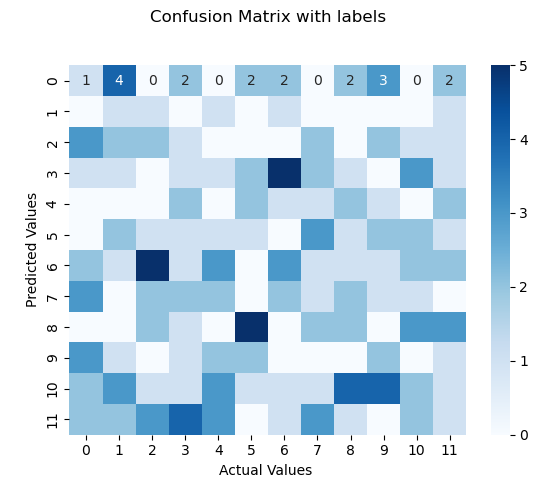

In [3]:
pullData("locationdatarandom")

                     child_id                   real_ei  \
0    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
1    65e5dcbc38f826f29267200e  65d75a2ce09e67e025e8cd30   
2    65e5daec38f826f292672009  65d75a2ce09e67e025e8cd30   
3    65e5db4d38f826f29267200a  65d75a2ce09e67e025e8cd30   
4    65e5db9f38f826f29267200b  65d75a2ce09e67e025e8cd30   
..                        ...                       ...   
190  65e6044938f826f292672031  65d75dfae09e67e025e8cd3b   
191  65e6049b38f826f292672032  65d75dfae09e67e025e8cd3b   
192  65e5e60a38f826f29267201e  65d75dfae09e67e025e8cd3b   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75d08e09e67e025e8cd36  
1    65d75c87e09e67e025e8cd33  
2    65d75da9e09e67e025e8cd39  
3    65d75da9e09e67e025e8cd39  
4    65d75c87e09e67e025e8cd33  
..                        ...  
190  65d75dd5e09e67e025e8cd3a  
191  65d75dd5e09e67e025e8cd3a  
192

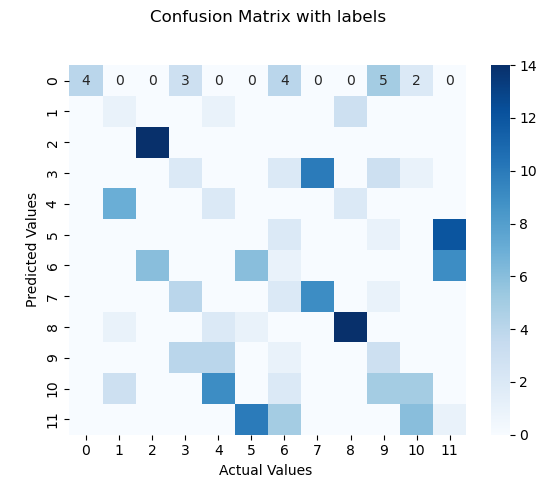

In [5]:
pullData("locationdataalgo2")

                     child_id                   real_ei  \
0    65e5d9ad38f826f292672007  65d75dd5e09e67e025e8cd3a   
1    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
2    65e5ca5838f826f292671fea  65d75da9e09e67e025e8cd39   
3    65d8ba3ae09e67e025e8cd83  65d75ce1e09e67e025e8cd35   
4    65e5dec738f826f292672012  65d75a2ce09e67e025e8cd30   
..                        ...                       ...   
190  65d8bb48e09e67e025e8cd85  65d75d08e09e67e025e8cd36   
191  65d8bcaae09e67e025e8cd87  65d75d08e09e67e025e8cd36   
192  65d8bdb5e09e67e025e8cd89  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

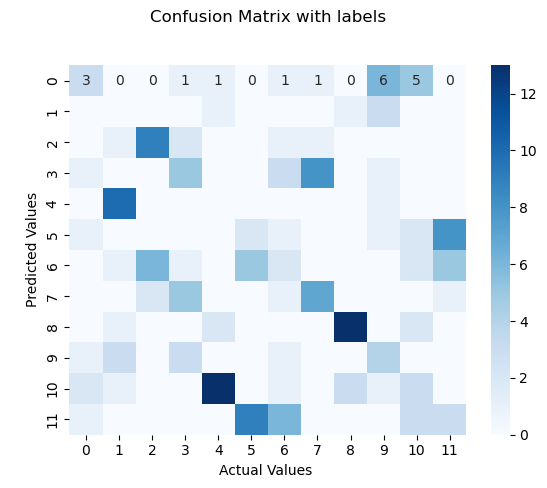

In [6]:
pullData("locationdataalgo3")

                     child_id                   real_ei  \
0    65d8da66e09e67e025e8cdbd  65d75da9e09e67e025e8cd39   
1    65e5ca5838f826f292671fea  65d75da9e09e67e025e8cd39   
2    65d8b945e09e67e025e8cd81  65d75ce1e09e67e025e8cd35   
3    65e5d4d238f826f292671ffc  65d75dd5e09e67e025e8cd3a   
4    65e5d71c38f826f292672001  65d75dd5e09e67e025e8cd3a   
..                        ...                       ...   
190  65d8bdb5e09e67e025e8cd89  65d75d08e09e67e025e8cd36   
191  65d8c2bde09e67e025e8cd92  65d75d08e09e67e025e8cd36   
192  65d8c331e09e67e025e8cd93  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

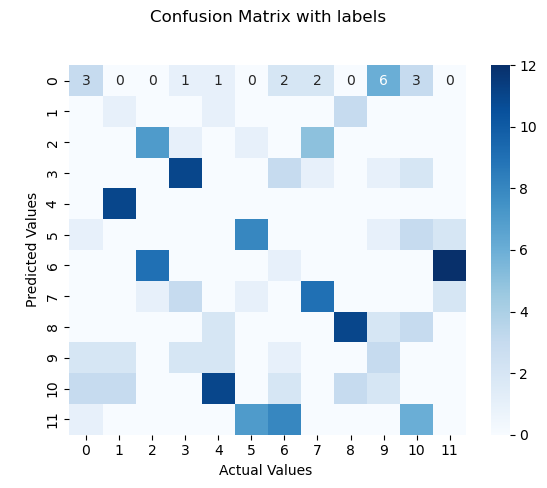

In [7]:
pullData("locationdataalgo4")

                     child_id                   real_ei  \
0    65e5ca5838f826f292671fea  65d75da9e09e67e025e8cd39   
1    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
2    65e5dbff38f826f29267200c  65d75a2ce09e67e025e8cd30   
3    65e5dd2b38f826f29267200f  65d75a2ce09e67e025e8cd30   
4    65e5dec738f826f292672012  65d75a2ce09e67e025e8cd30   
..                        ...                       ...   
190  65d8bb48e09e67e025e8cd85  65d75d08e09e67e025e8cd36   
191  65d8bd34e09e67e025e8cd88  65d75d08e09e67e025e8cd36   
192  65d76b1ee09e67e025e8cd4a  65d75c59e09e67e025e8cd32   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

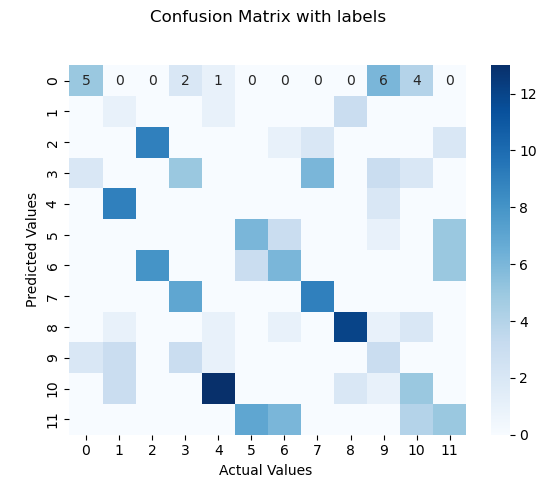

In [8]:
pullData("locationdataalgo5")

                     child_id                   real_ei  \
0    65e5cc1b38f826f292671fed  65d75da9e09e67e025e8cd39   
1    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
2    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
3    65d8dabde09e67e025e8cdbe  65d75da9e09e67e025e8cd39   
4    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
..                        ...                       ...   
190  65d8b679e09e67e025e8cd7b  65d75ce1e09e67e025e8cd35   
191  65d8b6f8e09e67e025e8cd7c  65d75ce1e09e67e025e8cd35   
192  65d8c2bde09e67e025e8cd92  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

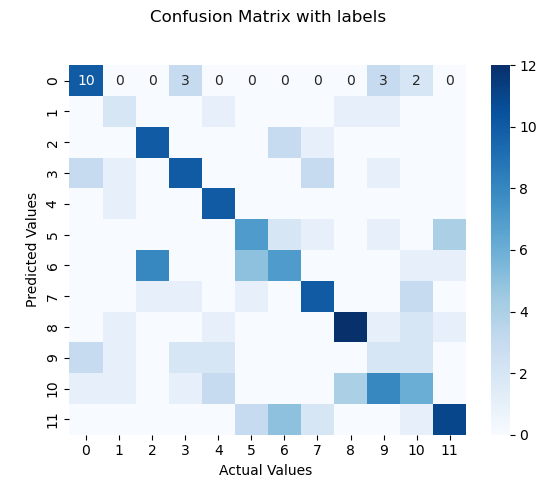

In [9]:
pullData("locationdataalgo6")

                     child_id                   real_ei  \
0    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
1    65d8d9bce09e67e025e8cdbc  65d75d80e09e67e025e8cd38   
2    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
3    65d8dabde09e67e025e8cdbe  65d75da9e09e67e025e8cd39   
4    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
..                        ...                       ...   
190  65d8b770e09e67e025e8cd7d  65d75ce1e09e67e025e8cd35   
191  65d8b7d1e09e67e025e8cd7e  65d75ce1e09e67e025e8cd35   
192  65d8bd34e09e67e025e8cd88  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

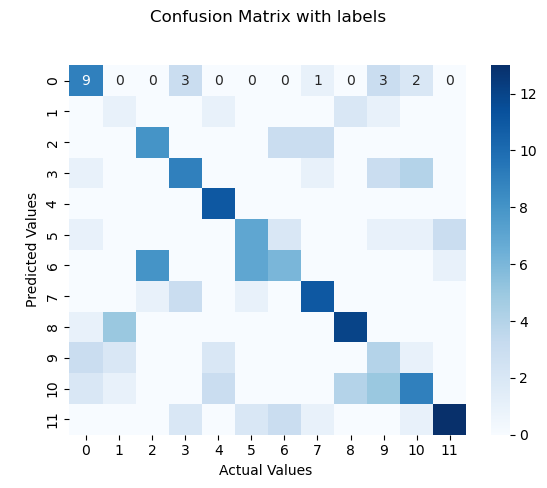

In [10]:
pullData("locationdataalgo7")

                     child_id                   real_ei  \
0    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
1    65d8d5dbe09e67e025e8cdb3  65d75d80e09e67e025e8cd38   
2    65d8d9bce09e67e025e8cdbc  65d75d80e09e67e025e8cd38   
3    65e5d41e38f826f292671ffb  65d75dd5e09e67e025e8cd3a   
4    65e5d4d238f826f292671ffc  65d75dd5e09e67e025e8cd3a   
..                        ...                       ...   
190  65d8b945e09e67e025e8cd81  65d75ce1e09e67e025e8cd35   
191  65d8bcaae09e67e025e8cd87  65d75d08e09e67e025e8cd36   
192  65d8c2bde09e67e025e8cd92  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

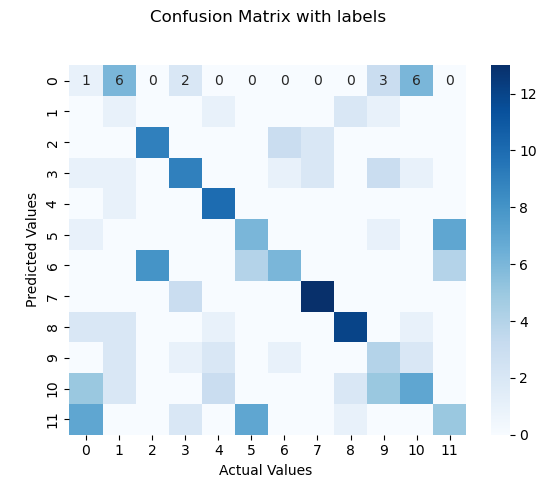

In [11]:
pullData("locationdataalgo8")

                     child_id                   real_ei  \
0    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
1    65d8dabde09e67e025e8cdbe  65d75da9e09e67e025e8cd39   
2    65e5ca5838f826f292671fea  65d75da9e09e67e025e8cd39   
3    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
4    65e5cdba38f826f292671ff0  65d75da9e09e67e025e8cd39   
..                        ...                       ...   
190  65d8b8b7e09e67e025e8cd80  65d75ce1e09e67e025e8cd35   
191  65d8b9c0e09e67e025e8cd82  65d75ce1e09e67e025e8cd35   
192  65e5e60a38f826f29267201e  65d75dfae09e67e025e8cd3b   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

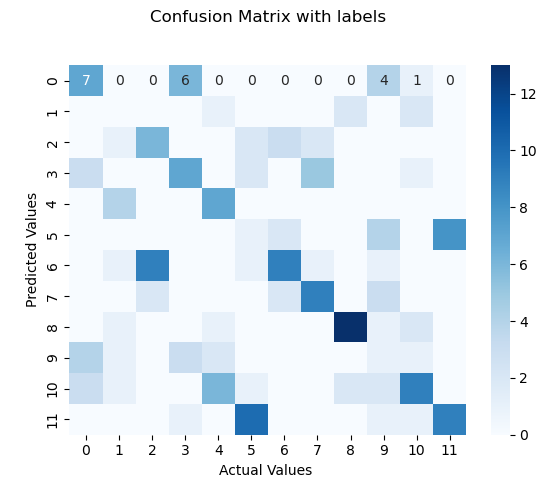

In [12]:
pullData("locationdataalgo9")

                     child_id                   real_ei  \
0    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
1    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
2    65d8dabde09e67e025e8cdbe  65d75da9e09e67e025e8cd39   
3    65e5ca5838f826f292671fea  65d75da9e09e67e025e8cd39   
4    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
..                        ...                       ...   
190  65d8ba3ae09e67e025e8cd83  65d75ce1e09e67e025e8cd35   
191  65d8bb48e09e67e025e8cd85  65d75d08e09e67e025e8cd36   
192  65d8bd34e09e67e025e8cd88  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

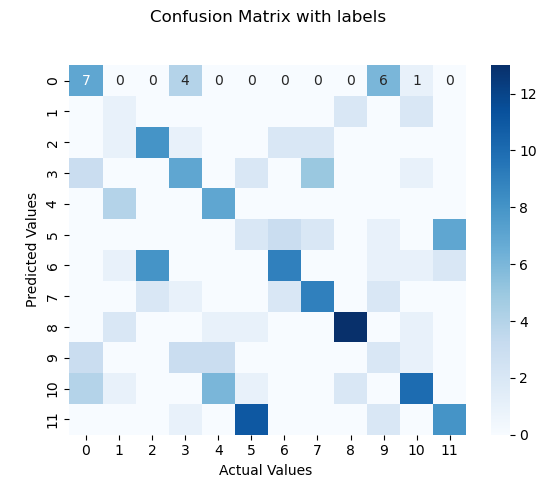

In [13]:
pullData("locationdataalgo10")

                     child_id                   real_ei  \
0    65e5d77e38f826f292672002  65d75dd5e09e67e025e8cd3a   
1    65e5dc4f38f826f29267200d  65d75a2ce09e67e025e8cd30   
2    65d8dabde09e67e025e8cdbe  65d75da9e09e67e025e8cd39   
3    65e5cb8538f826f292671fec  65d75da9e09e67e025e8cd39   
4    65e5cdba38f826f292671ff0  65d75da9e09e67e025e8cd39   
..                        ...                       ...   
190  65d8b9c0e09e67e025e8cd82  65d75ce1e09e67e025e8cd35   
191  65e5e60a38f826f29267201e  65d75dfae09e67e025e8cd3b   
192  65d8bd34e09e67e025e8cd88  65d75d08e09e67e025e8cd36   
193  65e5d57838f826f292671ffd  65d75dd5e09e67e025e8cd3a   
194  65e5fe7438f826f292672025  65d75dfae09e67e025e8cd3b   

                allocation_ei  
0    65d75a2ce09e67e025e8cd30  
1    65d75a2ce09e67e025e8cd30  
2    65d75a2ce09e67e025e8cd30  
3    65d75a2ce09e67e025e8cd30  
4    65d75a2ce09e67e025e8cd30  
..                        ...  
190  65d75dfae09e67e025e8cd3b  
191  65d75dfae09e67e025e8cd3b  
192

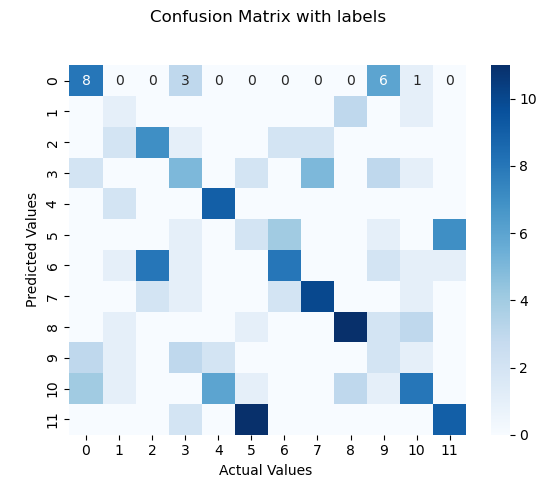

In [14]:
pullData("locationdataalgo11")